# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [4]:
#1. Idade media das mães e dos pais por município (coluna munResNome)
idade_media_mae_pais = sinasc_raw.groupby('munResNome')[['IDADEMAE', 'IDADEPAI']].mean().round(1)
print(idade_media_mae_pais)

                           IDADEMAE  IDADEPAI
munResNome                                   
Alta Floresta D'Oeste          26.0      29.5
Alto Alegre dos Parecis        24.8      29.2
Alto Paraíso                   25.0      28.8
Alvorada D'Oeste               25.8      30.8
Ariquemes                      25.6      32.5
Buritis                        25.6      30.8
Cabixi                         26.0      34.3
Cacaulândia                    25.5      36.3
Cacoal                         26.9      30.9
Campo Novo de Rondônia         24.8      30.5
Candeias do Jamari             25.2      29.9
Castanheiras                   27.3      30.4
Cerejeiras                     27.2      31.7
Chupinguaia                    25.3      29.6
Colorado do Oeste              27.6      34.4
Corumbiara                     24.7      32.5
Costa Marques                  24.4      30.6
Cujubim                        24.5      31.4
Espigão D'Oeste                26.1      31.2
Governador Jorge Teixeira      24.

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [5]:
#2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
data_aniversário = '2019-08-31'
peso_medio_bebes = sinasc_raw[sinasc_raw['DTNASC'] == data_aniversário].groupby(['SEXO', 'ESCMAE'])['PESO'].mean().round(1)
print(peso_medio_bebes)

SEXO       ESCMAE         
Feminino   1 a 3 anos         2760.0
           12 anos ou mais    2849.2
           4 a 7 anos         2731.0
           8 a 11 anos        3378.6
Masculino  1 a 3 anos         2213.0
           12 anos ou mais    3310.6
           4 a 7 anos         3252.5
           8 a 11 anos        3511.8
Name: PESO, dtype: float64


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [6]:
#3.1 Qual o municipio que nasceu menos bebe em 2019?
municipio_menos_bebes = sinasc_raw.groupby('munResNome')['DTNASC'].count().idxmin()
municipio_menos_bebes

'Município ignorado - RO'

In [7]:
idade_media_mae = sinasc_raw[sinasc_raw['munResNome'] == municipio_menos_bebes]['IDADEMAE'].mean().round(1)
idade_media_mae

24.0

In [8]:
idade_media_pai = sinasc_raw[sinasc_raw['munResNome'] == municipio_menos_bebes]['IDADEPAI'].mean().round(1)
idade_media_pai

22.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [9]:
#4.0 Qual o municipio que nasceu mais bebe no mês de março?
municipio_mais_bebes_marco = sinasc_raw[sinasc_raw['DTNASC'].str.startswith('2019-03')].groupby('munResNome')['DTNASC'].count().idxmax()
municipio_mais_bebes_marco

'Porto Velho'

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

In [18]:
filhos_vivos_media = sinasc_raw[sinasc_raw['munResNome'] == municipio_mais_bebes_marco]['QTDFILVIVO'].mean().round(1)
filhos_vivos_media

1.2

In [19]:
idade_media_pedrovelho = sinasc_raw[sinasc_raw['munResNome'] == municipio_mais_bebes_marco]['IDADEPAI'].mean().round(1)
idade_media_pedrovelho

32.4

In [20]:
idade_media_mae_pedrovelho = sinasc_raw[sinasc_raw['munResNome'] == municipio_mais_bebes_marco]['IDADEMAE'].mean().round(1)
idade_media_mae_pedrovelho

26.3

In [21]:
idade_media_pai_pedrovelho = sinasc_raw[sinasc_raw['munResNome'] == municipio_mais_bebes_marco]['IDADEPAI'].mean().round(1)
idade_media_pai_pedrovelho

32.4

In [22]:
idade_minima_mae_pedrovelho = sinasc_raw[sinasc_raw['munResNome'] == municipio_mais_bebes_marco]['IDADEMAE'].min()
idade_minima_mae_pedrovelho

12

In [23]:
idade_minima_pai_pedrovelho = sinasc_raw[sinasc_raw['munResNome'] == municipio_mais_bebes_marco]['IDADEPAI'].min()
idade_minima_pai_pedrovelho

16.0

In [24]:
idade_maxima_mae_pedrovelho = sinasc_raw[sinasc_raw['munResNome'] == municipio_mais_bebes_marco]['IDADEMAE'].max()
idade_maxima_mae_pedrovelho

47

In [25]:
idade_maxima_pai_pedrovelho = sinasc_raw[sinasc_raw['munResNome'] == municipio_mais_bebes_marco]['IDADEPAI'].max()
idade_maxima_pai_pedrovelho

65.0

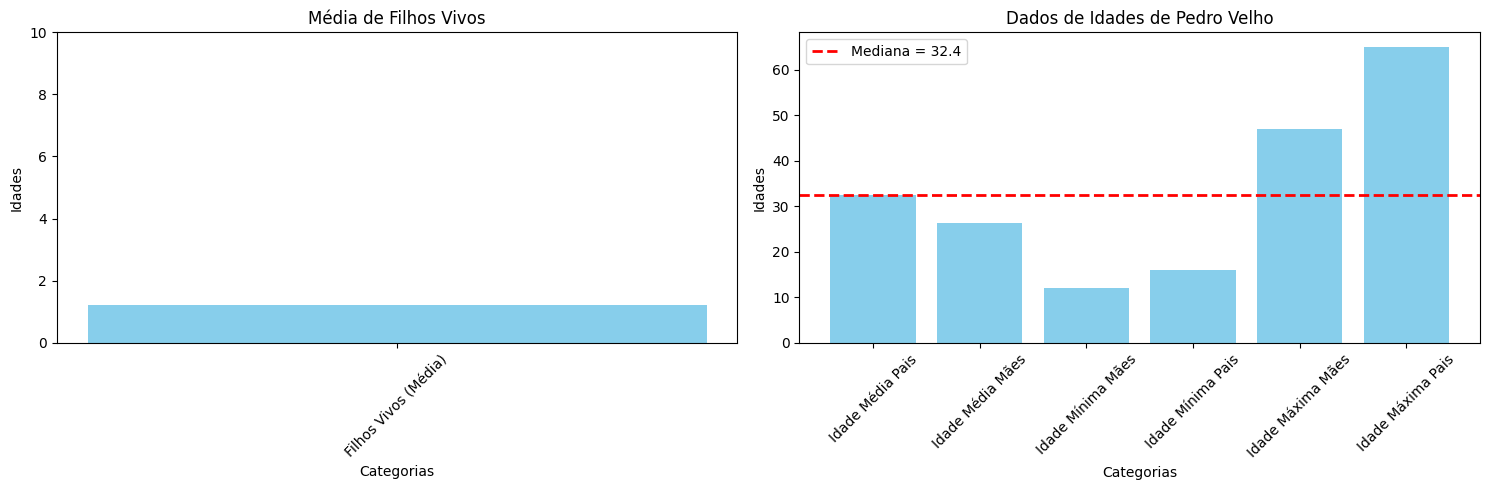

In [31]:
idades = [idade_media_pedrovelho, idade_media_mae_pedrovelho, idade_media_pai_pedrovelho,
          idade_minima_mae_pedrovelho, idade_minima_pai_pedrovelho, idade_maxima_mae_pedrovelho, idade_maxima_pai_pedrovelho]
mediana_idades = np.median(idades)

# Criar a matriz de gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Filhos Vivos (Média)
ax1.bar(['Filhos Vivos (Média)'], [filhos_vivos_media], color='skyblue')
ax1.set_xlabel('Categorias', fontsize=10)
ax1.set_ylabel('Idades', fontsize=10)
ax1.set_title('Média de Filhos Vivos', fontsize=12)
ax1.set_ylim(0, 10)  # Ajustar a escala do eixo Y de 0 a 10
ax1.tick_params(axis='x', labelrotation=45, labelsize=10)
ax1.tick_params(axis='y', labelsize=10)

# Gráfico 2: Idades
labels_idades = ['Idade Média Pais', 'Idade Média Mães', 'Idade Mínima Mães', 'Idade Mínima Pais', 'Idade Máxima Mães', 'Idade Máxima Pais']
values_idades = [idade_media_pedrovelho, idade_media_mae_pedrovelho, idade_minima_mae_pedrovelho, idade_minima_pai_pedrovelho, idade_maxima_mae_pedrovelho, idade_maxima_pai_pedrovelho]
ax2.bar(labels_idades, values_idades, color='skyblue')
ax2.axhline(y=mediana_idades, color='red', linestyle='--', linewidth=2, label=f'Mediana = {mediana_idades}')
ax2.set_xlabel('Categorias', fontsize=10)
ax2.set_ylabel('Idades', fontsize=10)
ax2.set_title('Dados de Idades de Pedro Velho', fontsize=12)
ax2.tick_params(axis='x', labelrotation=45, labelsize=10)
ax2.tick_params(axis='y', labelsize=10)
ax2.legend()

# Ajustar o layout
plt.tight_layout()


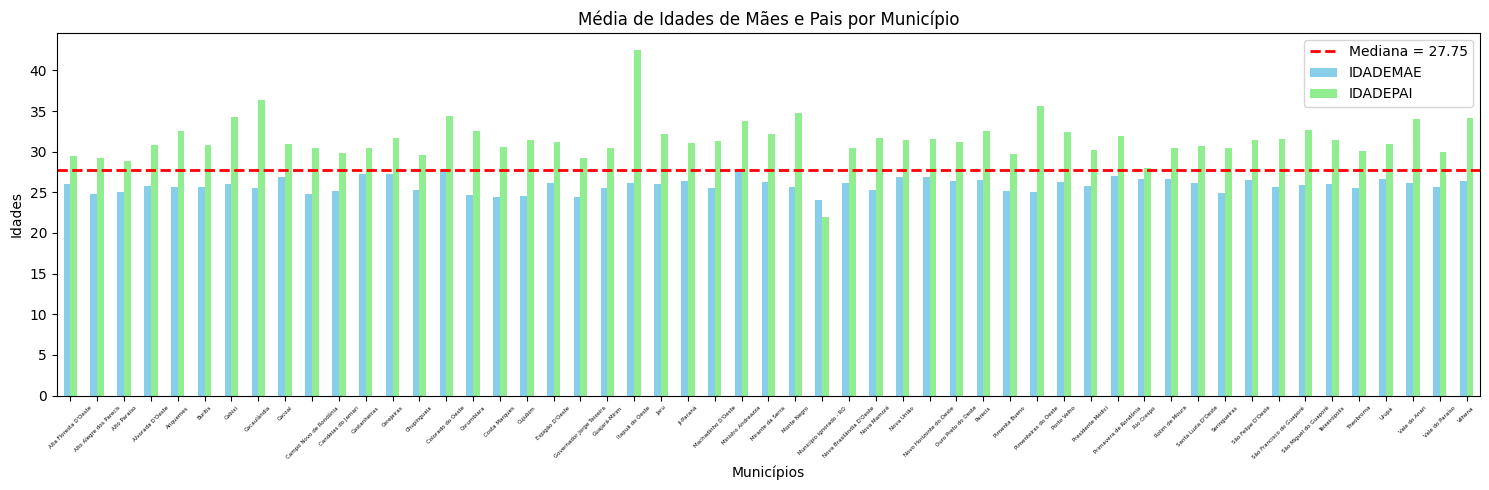

In [39]:
# Calcular a mediana das idades (juntando idade das mães e pais)
idades = idade_media_mae_pais.values.flatten()
mediana_idades = np.median(idades)

# Criar a matriz de gráficos
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Gráfico: Média de Idades de Mães e Pais por Município
idade_media_mae_pais.plot(kind='bar', ax=ax, color=['skyblue', 'lightgreen'])
ax.axhline(y=mediana_idades, color='red', linestyle='--', linewidth=2, label=f'Mediana = {mediana_idades}')
ax.set_xlabel('Municípios', fontsize=10)
ax.set_ylabel('Idades', fontsize=10)
ax.set_title('Média de Idades de Mães e Pais por Município', fontsize=12)
ax.tick_params(axis='x', labelrotation=45, labelsize=4)  # Diminui o tamanho da fonte dos municípios
ax.tick_params(axis='y', labelsize=10)
ax.legend()

# Ajustar o layout
plt.tight_layout()
plt.show()

In [40]:
# Calcular a mediana das idades para cada município
idade_media_mae_pais['Mediana'] = idade_media_mae_pais.median(axis=1)

# Encontrar o município com a maior mediana
maior_mediana = idade_media_mae_pais['Mediana'].idxmax()
mediana_valor = idade_media_mae_pais['Mediana'].max()

print(f"O município com a maior mediana de idades é {maior_mediana} com uma mediana de {mediana_valor} anos.")

O município com a maior mediana de idades é Itapuã do Oeste com uma mediana de 34.3 anos.


In [41]:
menor_mediana = idade_media_mae_pais['Mediana'].idxmin()
mediana_valor_menor = idade_media_mae_pais['Mediana'].min()

print(f"O município com a menor mediana de idades é {menor_mediana} com uma mediana de {mediana_valor_menor} anos.")

O município com a menor mediana de idades é Município ignorado - RO com uma mediana de 23.0 anos.


Analisando os dois gráficos, pude perceber que a mediana de idade das cidades, Itapoã do Oeste foi a maior de todas, enquando a mediana da capital ficou em 32.4. Já Municipio Ignorado teve a menor de todas com 23 anos.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [12]:
sinasc_raw.dtypes

,0
ORIGEM,int64
CODESTAB,float64
CODMUNNASC,int64
LOCNASC,int64
IDADEMAE,int64
...,...
munResUf,object
munResLat,float64
munResLon,float64
munResAlt,float64


In [13]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [ ]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')